<a href="https://colab.research.google.com/github/OmkarV23/House-pricing/blob/main/house_pricing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold
from sklearn.ensemble import GradientBoostingClassifier

In [95]:
train = pd.read_csv('/content/drive/MyDrive/house pricing set/train.csv')
test = pd.read_csv('/content/drive/MyDrive/house pricing set/test.csv')

In [84]:
train.shape

(1460, 81)

In [96]:
num_columns  = train.select_dtypes(include=['int64','float64']).columns
cat_features = train.select_dtypes(include='object').columns

In [86]:
train.isnull().sum().sort_values(ascending=False)[:38]

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageCond        81
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
Utilities          0
YearRemodAdd       0
MSSubClass         0
Foundation         0
ExterCond          0
ExterQual          0
Exterior2nd        0
Exterior1st        0
RoofMatl           0
RoofStyle          0
YearBuilt          0
LotConfig          0
OverallCond        0
OverallQual        0
HouseStyle         0
BldgType           0
Condition2         0
BsmtFinSF1         0
MSZoning           0
dtype: int64

In [ ]:
for i in num_columns:
    
    train[i].fillna(train[i].median(), inplace=True)
    if(i != "SalePrice"): 
        test[i].fillna(test[i].median(), inplace=True)

In [98]:
cat_column_has_null = ["Alley", "Electrical", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "FireplaceQu", "GarageType", "GarageFinish", "GarageQual", "GarageCond", "PoolQC", "Fence", "MiscFeature"]

for i in cat_features:
    train[i].fillna("None", inplace=True)
    test[i].fillna("None", inplace=True)

In [99]:
from sklearn.preprocessing import LabelEncoder

for i in cat_features:
    print(i)
    train[i] = LabelEncoder().fit_transform(train[i])  
    test[i] = LabelEncoder().fit_transform(test[i])

MSZoning
Street
Alley
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive
PoolQC
Fence
MiscFeature
SaleType
SaleCondition


In [111]:
train = train.drop(columns=['Id','Street','PoolQC','Utilities'],axis=1)
test = test.drop(columns=['Id','Street','PoolQC','Utilities'],axis=1)
# some columns are dropped because there are many missing values

In [101]:
train_X = train.drop('SalePrice', axis = 1) 
train_y = train['SalePrice']
train_X.shape, train_y.shape

((1460, 76), (1460,))

In [102]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_X, train_y,test_size = 0.2, random_state = 1)

In [103]:
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt

def Model(estimator):
    estimator.fit(X_train, y_train)
    prediction = estimator.predict(X_test)
    accuracy_score = estimator.score(X_train, y_train)
    print( "Prediction Score", (accuracy_score * 100).round(2))
    print('R_squared:', metrics.r2_score(y_test, prediction))
    print('Square Root of MSE:',np.sqrt(metrics.mean_squared_error(y_test, prediction)))
    plt.figure(figsize=(10,5))
    sns.distplot(y_test, hist=True, kde=False)
    sns.distplot(prediction, hist=True, kde=False)
    plt.legend(labels=['Actual Values of Price', 'Predicted Values of Price'])
    plt.xlim(0,)
def FeatureBar(model_Features, Title, yLabel):
    plt.bar(df.columns[df.columns!='SalePrice'].values, model_Features)
    plt.xticks(rotation=45)
    plt.title(Title)
    plt.ylabel(yLabel)

Prediction Score 100.0
R_squared: 0.9029168849667611
Square Root of MSE: 26313.328927251157


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


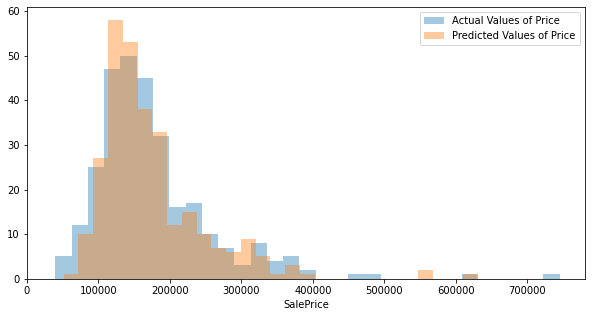

In [104]:
from sklearn.ensemble import GradientBoostingRegressor

dt = GradientBoostingRegressor(loss='ls', learning_rate=0.1, max_depth=10, random_state=0, n_estimators=1000)
Model(dt)

Prediction Score 84.73
R_squared: 0.8118505249112506
Square Root of MSE: 36631.56292947166


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


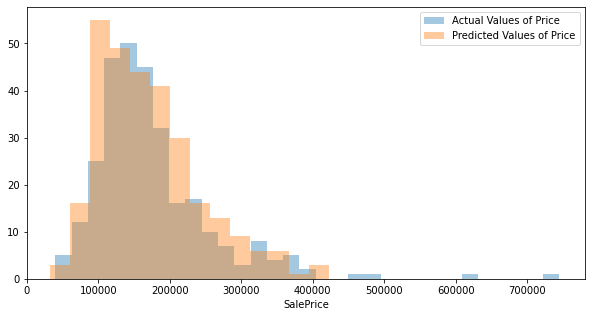

In [105]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
Model(lr)

Prediction Score 99.97
R_squared: 0.7734852996301572
Square Root of MSE: 40193.15883316739


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


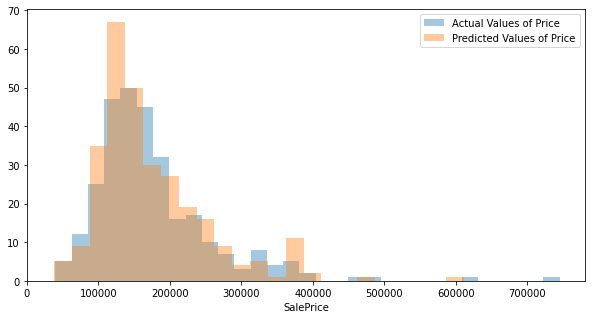

In [106]:
from sklearn.tree import DecisionTreeRegressor

dr = DecisionTreeRegressor(max_depth=15, random_state=0, splitter="random")
Model(dr)

In [ ]:
#from sklearn import svm
#sv = svm()

In [108]:
regressor = ['Linear Regression', 'Gradient Boosted Decision Tree', 'Decision Tree']
models = [LinearRegression(), DecisionTreeRegressor(max_depth=15, random_state=0), GradientBoostingRegressor(loss='ls', learning_rate=0.1, max_depth=10, random_state=0, n_estimators=1000)]
R_squared = []
RMSE = []
Prediction_score = []
for m in models:
    m.fit(X_train, y_train)
    prediction_m = m.predict(X_test)
    accuracy_score = m.score(X_train, y_train)
    prediction_score = (accuracy_score * 100).round(2)
    r2 = metrics.r2_score(y_test, prediction_m)
    rmse = np.sqrt(metrics.mean_squared_error(y_test, prediction_m))
    Prediction_score.append(prediction_score)
    R_squared.append(r2)
    RMSE.append(rmse)
basic_result = pd.DataFrame({'R squared':R_squared,'RMSE(Root Mean Squared Error)':RMSE,'Prediction Score':Prediction_score}, index=regressor)
basic_result

,R squared,RMSE(Root Mean Squared Error),Prediction Score
Linear Regression,0.811851,36631.562929,84.73
Gradient Boosted Decision Tree,0.827547,35070.321316,99.96
Decision Tree,0.902917,26313.328927,100.00


In [112]:
dt.fit(X_train, y_train)
dt_predictions = dt.predict(test)

lr.fit(X_train, y_train)
lr_predictions = lr.predict(test)

dr.fit(X_train, y_train)
dr_predictions = dr.predict(test)

In [114]:
#import test data again
test_again = pd.read_csv("/content/drive/MyDrive/house pricing set/test.csv")
final_result = pd.DataFrame({"Id": test_again["Id"],
        "sale price using linear regression": lr_predictions, "sale price using Gradient Boosted Decision Tree": dt_predictions, "sale price using Decision Tree": dr_predictions})
final_result.to_csv("final_result.csv", index=False)
print(final_result.shape)

(1459, 4)
